# Project 7

## Sys Ops

In [1]:
cd ..

/home/alex/tmp/P7-ML-Rudy


/home/alex/tmp/P7-ML-Rudy/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
pwd

'/home/alex/tmp/P7-ML-Rudy'

## Imports 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

from sklearn.feature_selection import *
from sklearn.feature_extraction import *
from sklearn.decomposition import *
from sklearn.model_selection import *
from sklearn.impute import *
from sklearn.preprocessing import *
from sklearn.pipeline import *
from sklearn.covariance import *
from sklearn.metrics import *
from sklearn.compose import *

from sklearn.dummy import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.cluster import *

In [4]:
# DO NOT REMOVE THIS LINE

## Data

In [5]:
fn = "application_train.csv"
df = pd.read_csv("./data/source/" + fn)

In [6]:
df.shape

(307511, 122)

In [7]:
df = df.sample(frac=0.1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
299528,447009,0,Revolving loans,F,Y,Y,0,270000.0,585000.0,29250.0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
97172,212807,0,Cash loans,M,N,Y,0,225000.0,283585.5,28620.0,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0
184935,314380,0,Cash loans,F,N,Y,0,180000.0,1350000.0,51552.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
226224,362023,0,Revolving loans,F,N,Y,0,270000.0,1350000.0,67500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
200714,332662,0,Cash loans,M,N,N,2,157500.0,2013840.0,55507.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203444,335859,0,Cash loans,M,Y,Y,0,270000.0,271957.5,28687.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
297075,444177,0,Cash loans,M,Y,Y,1,405000.0,1058197.5,38137.5,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0
234059,371117,0,Cash loans,M,Y,Y,0,112500.0,254700.0,14350.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
277630,421674,0,Revolving loans,F,N,N,1,67500.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# filter for correl
# df = df.filter(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
#                'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
#                ])

df = df.filter(
    [
        "TARGET",
        "NAME_CONTRACT_TYPE",
        "CODE_GENDER",
        "FLAG_OWN_CAR",
        "FLAG_OWN_REALTY",
        "CNT_CHILDREN",
        "AMT_INCOME_TOTAL",
        "AMT_CREDIT",
        "AMT_ANNUITY",
        "AMT_GOODS_PRICE",
        "NAME_TYPE_SUITE",
        "NAME_INCOME_TYPE",
        "NAME_EDUCATION_TYPE",
        "NAME_FAMILY_STATUS",
        "NAME_HOUSING_TYPE",
        "DAYS_BIRTH",
        "DAYS_EMPLOYED",
        "ORGANIZATION_TYPE",
        "OCCUPATION_TYPE",
        "EXT_SOURCE_1",
        "EXT_SOURCE_2",
        "EXT_SOURCE_3",
    ]
)


df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
299528,0,Revolving loans,F,Y,Y,0,270000.0,585000.0,29250.0,585000.0,...,Higher education,Married,House / apartment,-18506,-8956,Other,NaN,NaN,0.739046,0.577969
97172,0,Cash loans,M,N,Y,0,225000.0,283585.5,28620.0,256500.0,...,Higher education,Single / not married,House / apartment,-9972,-217,School,Managers,0.246656,0.704893,0.438281
184935,0,Cash loans,F,N,Y,0,180000.0,1350000.0,51552.0,1350000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-19352,-11193,Other,NaN,NaN,0.770729,0.771362
226224,0,Revolving loans,F,N,Y,0,270000.0,1350000.0,67500.0,1350000.0,...,Higher education,Single / not married,House / apartment,-13986,-701,Business Entity Type 3,Accountants,0.926330,0.712531,0.763640
200714,0,Cash loans,M,N,N,2,157500.0,2013840.0,55507.5,1800000.0,...,Secondary / secondary special,Married,House / apartment,-14247,-2425,Medicine,Laborers,NaN,0.707783,0.621226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203444,0,Cash loans,M,Y,Y,0,270000.0,271957.5,28687.5,252000.0,...,Secondary / secondary special,Single / not married,House / apartment,-9233,-1265,Business Entity Type 3,Drivers,0.484035,0.456096,0.581484
297075,0,Cash loans,M,Y,Y,1,405000.0,1058197.5,38137.5,913500.0,...,Higher education,Married,House / apartment,-13319,-2211,Other,NaN,0.381676,0.599163,0.355639
234059,0,Cash loans,M,Y,Y,0,112500.0,254700.0,14350.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-23975,365243,XNA,NaN,NaN,0.204581,NaN
277630,0,Revolving loans,F,N,N,1,67500.0,202500.0,10125.0,202500.0,...,Higher education,Single / not married,House / apartment,-12298,-2622,Business Entity Type 3,Private service staff,NaN,0.534781,0.554947


## EDA Exploratory Data Analysis

In [9]:
df.sort_values("AMT_INCOME_TOTAL", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
181698,0,Cash loans,M,Y,Y,1,3950059.5,675000.0,66217.5,675000.0,...,Higher education,Married,With parents,-10572,-3163,Trade: type 2,Managers,NaN,0.597760,0.730987
107926,0,Cash loans,M,Y,Y,0,2930026.5,900000.0,36657.0,900000.0,...,Secondary / secondary special,Married,House / apartment,-15523,-3285,Business Entity Type 3,Managers,NaN,0.580437,0.569149
195807,0,Revolving loans,M,Y,Y,0,2250000.0,1350000.0,67500.0,1350000.0,...,Higher education,Married,House / apartment,-17229,-761,Business Entity Type 3,NaN,NaN,0.741421,0.863363
206814,0,Cash loans,F,N,Y,0,2250000.0,976077.0,52132.5,922500.0,...,Higher education,Separated,House / apartment,-22734,-3399,Business Entity Type 3,Managers,0.928757,0.626006,0.177704
35572,0,Cash loans,F,Y,Y,1,2025000.0,733315.5,41076.0,679500.0,...,Higher education,Married,House / apartment,-8312,-813,Business Entity Type 3,Sales staff,0.465245,0.647443,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134957,0,Cash loans,F,N,Y,0,27000.0,227520.0,8707.5,180000.0,...,Secondary / secondary special,Separated,House / apartment,-22313,365243,XNA,NaN,NaN,0.229003,0.605836
76778,1,Cash loans,F,N,N,0,27000.0,225000.0,8482.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-12141,-1482,School,NaN,NaN,0.329355,0.303146
125059,0,Cash loans,F,N,N,1,27000.0,343800.0,13090.5,225000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-13706,-4565,Business Entity Type 3,NaN,NaN,0.160529,NaN
111197,1,Cash loans,F,N,N,0,27000.0,215640.0,11290.5,180000.0,...,Secondary / secondary special,Married,House / apartment,-19360,365243,XNA,NaN,NaN,0.254167,0.535276


In [10]:
df.sort_values("AMT_CREDIT", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
87956,1,Cash loans,F,N,N,1,229500.0,3020760.0,79816.5,2700000.0,...,Secondary / secondary special,Separated,House / apartment,-13106,-1379,Business Entity Type 3,Laborers,0.344435,0.435396,0.713631
7642,0,Cash loans,M,Y,N,1,382500.0,2925000.0,73944.0,2925000.0,...,Higher education,Civil marriage,House / apartment,-15752,-933,Trade: type 7,Managers,0.503985,0.591677,0.355639
271698,0,Cash loans,M,Y,N,2,450000.0,2700000.0,68256.0,2700000.0,...,Higher education,Married,House / apartment,-14412,-1114,Business Entity Type 1,Managers,NaN,0.461172,0.687933
191908,0,Cash loans,F,N,N,0,450000.0,2695500.0,71235.0,2250000.0,...,Secondary / secondary special,Married,House / apartment,-19150,-1511,Business Entity Type 3,Managers,0.866353,0.725596,0.562060
268268,1,Cash loans,M,Y,Y,1,297315.0,2695500.0,74254.5,2250000.0,...,Higher education,Civil marriage,House / apartment,-21012,-1474,Business Entity Type 1,Laborers,0.638351,0.663656,0.379100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255149,0,Cash loans,M,N,N,0,225000.0,45000.0,4608.0,45000.0,...,Incomplete higher,Married,House / apartment,-12741,-141,Transport: type 4,Sales staff,NaN,0.633145,NaN
124653,0,Cash loans,M,N,Y,0,157500.0,45000.0,4846.5,45000.0,...,Secondary / secondary special,Single / not married,House / apartment,-9344,-1381,Business Entity Type 3,Laborers,NaN,0.672717,0.344155
46482,0,Cash loans,F,N,N,0,90000.0,45000.0,4450.5,45000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-16823,-1121,Business Entity Type 2,Accountants,0.840130,0.528426,NaN
264346,0,Cash loans,F,Y,N,0,112500.0,45000.0,4977.0,45000.0,...,Incomplete higher,Single / not married,With parents,-8737,-1275,Business Entity Type 3,NaN,0.411937,0.701708,0.652897


In [11]:
df.sort_values("AMT_ANNUITY", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
266148,0,Revolving loans,M,Y,N,0,900000.0,2250000.0,225000.0,2250000.0,...,Higher education,Married,House / apartment,-22766,-1039,Other,Accountants,0.870042,0.744162,NaN
165190,0,Revolving loans,M,Y,Y,4,765000.0,2250000.0,225000.0,2250000.0,...,Higher education,Married,House / apartment,-14747,-5516,Industry: type 2,Managers,NaN,0.253144,0.834784
240036,0,Cash loans,M,Y,N,3,1350000.0,2250000.0,220297.5,2250000.0,...,Higher education,Married,House / apartment,-13505,-2376,Trade: type 7,Managers,NaN,0.735300,0.754406
149993,0,Cash loans,M,Y,Y,0,900000.0,1871280.0,180576.0,1800000.0,...,Higher education,Single / not married,House / apartment,-16886,-2676,Business Entity Type 3,Managers,0.516443,0.576122,0.472253
270305,0,Cash loans,M,N,N,0,445500.0,1800000.0,173574.0,1800000.0,...,Higher education,Married,House / apartment,-19464,-849,Trade: type 3,Core staff,0.506917,0.685888,0.726711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255874,1,Cash loans,F,N,Y,0,67500.0,53910.0,2722.5,45000.0,...,Secondary / secondary special,Single / not married,House / apartment,-23790,365243,XNA,NaN,NaN,0.512240,0.641368
90092,0,Cash loans,F,N,N,0,54000.0,72000.0,2713.5,72000.0,...,Secondary / secondary special,Married,House / apartment,-19049,-5280,Medicine,Waiters/barmen staff,NaN,0.634414,0.766234
269657,0,Cash loans,M,N,N,0,90000.0,67500.0,2542.5,67500.0,...,Secondary / secondary special,Single / not married,House / apartment,-17058,365243,XNA,NaN,NaN,0.393762,0.622922
169463,0,Cash loans,F,N,Y,0,45000.0,67500.0,2542.5,67500.0,...,Lower secondary,Widow,House / apartment,-24556,365243,XNA,NaN,NaN,0.581363,NaN


In [12]:
df.sort_values("AMT_GOODS_PRICE", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
7642,0,Cash loans,M,Y,N,1,382500.0,2925000.0,73944.0,2925000.0,...,Higher education,Civil marriage,House / apartment,-15752,-933,Trade: type 7,Managers,0.503985,0.591677,0.355639
271698,0,Cash loans,M,Y,N,2,450000.0,2700000.0,68256.0,2700000.0,...,Higher education,Married,House / apartment,-14412,-1114,Business Entity Type 1,Managers,NaN,0.461172,0.687933
87956,1,Cash loans,F,N,N,1,229500.0,3020760.0,79816.5,2700000.0,...,Secondary / secondary special,Separated,House / apartment,-13106,-1379,Business Entity Type 3,Laborers,0.344435,0.435396,0.713631
64591,0,Cash loans,M,Y,Y,1,469800.0,2475000.0,65290.5,2475000.0,...,Higher education,Married,House / apartment,-11384,-3680,Self-employed,HR staff,0.151127,0.422611,NaN
9850,0,Cash loans,F,Y,N,0,450000.0,2517300.0,72274.5,2250000.0,...,Higher education,Married,House / apartment,-13793,-4715,Legal Services,Core staff,0.753356,0.698881,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305833,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500.0,NaN,...,Incomplete higher,Single / not married,With parents,-10440,-3444,Self-employed,Core staff,0.164542,0.480353,0.698668
242644,0,Revolving loans,M,N,Y,2,112500.0,180000.0,9000.0,NaN,...,Secondary / secondary special,Married,House / apartment,-10229,-1468,Business Entity Type 3,Laborers,0.280868,0.285898,0.374021
244620,0,Revolving loans,M,N,Y,0,157500.0,337500.0,16875.0,NaN,...,Higher education,Single / not married,Municipal apartment,-12198,-4453,Business Entity Type 3,Accountants,0.161420,0.658556,0.051329
152608,0,Revolving loans,F,N,Y,0,112500.0,270000.0,13500.0,NaN,...,Secondary / secondary special,Married,House / apartment,-17936,-10109,Medicine,Medicine staff,0.614312,0.714221,NaN


In [13]:
df.sort_values("DAYS_BIRTH", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
249615,0,Cash loans,F,N,Y,0,157905.0,528952.5,13950.0,418473.0,...,Incomplete higher,Civil marriage,With parents,-7680,-431,Trade: type 2,Core staff,0.156435,0.578444,0.265049
269022,0,Revolving loans,F,N,Y,0,72000.0,135000.0,6750.0,135000.0,...,Secondary / secondary special,Married,House / apartment,-7686,-438,Medicine,Medicine staff,0.224848,0.482963,0.321735
58541,0,Cash loans,F,N,Y,0,135000.0,454500.0,23661.0,454500.0,...,Secondary / secondary special,Single / not married,House / apartment,-7687,-142,Trade: type 6,High skill tech staff,NaN,0.188380,NaN
90584,0,Revolving loans,F,N,N,0,63000.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Civil marriage,Rented apartment,-7688,-108,Business Entity Type 3,NaN,0.065703,0.085566,NaN
227157,0,Revolving loans,F,N,N,0,67500.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Married,House / apartment,-7688,-550,Business Entity Type 2,Sales staff,NaN,0.094795,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34213,0,Cash loans,F,N,Y,0,99000.0,239850.0,23850.0,225000.0,...,Secondary / secondary special,Married,House / apartment,-25151,365243,XNA,NaN,NaN,0.552146,0.542445
251330,0,Cash loans,F,N,Y,0,135000.0,225000.0,22383.0,225000.0,...,Secondary / secondary special,Married,House / apartment,-25161,365243,XNA,NaN,NaN,0.760385,0.759712
200068,0,Cash loans,F,N,Y,0,58500.0,225000.0,22050.0,225000.0,...,Secondary / secondary special,Married,House / apartment,-25165,365243,XNA,NaN,0.879006,0.515288,0.768808
65237,0,Cash loans,F,N,N,0,90000.0,126000.0,11790.0,126000.0,...,Secondary / secondary special,Widow,House / apartment,-25186,365243,XNA,NaN,NaN,0.179174,0.418854


In [14]:
df.sort_values("DAYS_EMPLOYED", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
153590,0,Cash loans,F,N,Y,0,67500.0,119448.0,6799.5,94500.0,...,Secondary / secondary special,Married,House / apartment,-24163,365243,XNA,NaN,NaN,0.760819,0.526295
1582,0,Cash loans,F,N,N,0,247500.0,1223010.0,48631.5,1125000.0,...,Secondary / secondary special,Widow,House / apartment,-20292,365243,XNA,NaN,0.584288,0.481330,0.282248
303734,0,Cash loans,F,Y,Y,0,175500.0,477175.5,45436.5,459000.0,...,Secondary / secondary special,Married,House / apartment,-19889,365243,XNA,NaN,0.629236,0.640323,0.710674
281120,0,Revolving loans,F,N,Y,0,112500.0,337500.0,16875.0,337500.0,...,Secondary / secondary special,Married,House / apartment,-22025,365243,XNA,NaN,0.850517,0.633729,0.859924
225057,0,Cash loans,F,N,N,0,292500.0,747886.5,39973.5,693000.0,...,Higher education,Married,House / apartment,-21467,365243,XNA,NaN,NaN,0.616803,0.652897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28065,0,Cash loans,F,N,Y,0,112500.0,454500.0,13828.5,454500.0,...,Secondary / secondary special,Separated,House / apartment,-23158,-16113,Business Entity Type 2,Laborers,NaN,0.646639,0.260856
77348,0,Cash loans,F,N,Y,0,202500.0,733315.5,69754.5,679500.0,...,Secondary / secondary special,Married,House / apartment,-23042,-16169,Industry: type 11,NaN,NaN,0.576699,0.659406
219428,0,Cash loans,F,N,Y,0,177750.0,733315.5,39069.0,679500.0,...,Secondary / secondary special,Married,House / apartment,-23602,-16360,Self-employed,Accountants,NaN,0.710516,0.483050
62757,0,Cash loans,F,N,Y,0,67500.0,239850.0,23494.5,225000.0,...,Secondary / secondary special,Widow,House / apartment,-24669,-16538,Government,Core staff,NaN,0.420840,0.707699


In [15]:
df.loc[df["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = float("NaN")

In [16]:
df.sort_values("DAYS_EMPLOYED", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
239303,0,Cash loans,M,Y,N,0,135000.0,942300.0,30528.0,675000.0,...,Secondary / secondary special,Married,House / apartment,-17842,-3.0,Other,Security staff,0.314016,0.528432,NaN
17355,1,Cash loans,F,N,N,1,225000.0,754740.0,24475.5,630000.0,...,Higher education,Married,House / apartment,-11199,-4.0,Kindergarten,Drivers,NaN,0.510765,0.028876
231582,1,Cash loans,F,Y,N,0,180000.0,450000.0,21888.0,450000.0,...,Higher education,Separated,With parents,-9926,-7.0,Bank,NaN,0.231677,0.678874,NaN
90916,0,Cash loans,M,Y,Y,0,270000.0,207396.0,16515.0,157500.0,...,Secondary / secondary special,Married,House / apartment,-11988,-13.0,Business Entity Type 2,Laborers,0.164549,0.514758,0.195198
151892,0,Cash loans,M,Y,N,1,225000.0,450000.0,34825.5,450000.0,...,Secondary / secondary special,Separated,House / apartment,-15286,-13.0,Business Entity Type 3,Managers,0.699732,0.474766,0.368969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,0,Cash loans,F,N,Y,0,157500.0,334152.0,18256.5,270000.0,...,Secondary / secondary special,Married,House / apartment,-21199,NaN,XNA,NaN,NaN,0.600207,NaN
1340,1,Cash loans,M,N,N,0,202500.0,450000.0,23562.0,450000.0,...,Secondary / secondary special,Married,House / apartment,-18388,NaN,XNA,NaN,NaN,0.644201,NaN
262945,0,Cash loans,M,Y,Y,0,450000.0,225000.0,26833.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-18985,NaN,XNA,NaN,NaN,0.494612,0.477649
70022,0,Cash loans,F,N,N,0,270000.0,390960.0,20470.5,337500.0,...,Secondary / secondary special,Married,House / apartment,-21143,NaN,XNA,NaN,0.651776,0.645078,0.586740


In [17]:
df.sort_values("DAYS_EMPLOYED", ascending=True)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
218832,0,Cash loans,F,N,N,0,180000.0,675000.0,29862.0,675000.0,...,Secondary / secondary special,Widow,Municipal apartment,-23627,-16767.0,Government,Core staff,0.742643,0.734661,0.581484
62757,0,Cash loans,F,N,Y,0,67500.0,239850.0,23494.5,225000.0,...,Secondary / secondary special,Widow,House / apartment,-24669,-16538.0,Government,Core staff,NaN,0.420840,0.707699
219428,0,Cash loans,F,N,Y,0,177750.0,733315.5,39069.0,679500.0,...,Secondary / secondary special,Married,House / apartment,-23602,-16360.0,Self-employed,Accountants,NaN,0.710516,0.483050
77348,0,Cash loans,F,N,Y,0,202500.0,733315.5,69754.5,679500.0,...,Secondary / secondary special,Married,House / apartment,-23042,-16169.0,Industry: type 11,NaN,NaN,0.576699,0.659406
28065,0,Cash loans,F,N,Y,0,112500.0,454500.0,13828.5,454500.0,...,Secondary / secondary special,Separated,House / apartment,-23158,-16113.0,Business Entity Type 2,Laborers,NaN,0.646639,0.260856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,0,Cash loans,F,N,Y,0,157500.0,334152.0,18256.5,270000.0,...,Secondary / secondary special,Married,House / apartment,-21199,NaN,XNA,NaN,NaN,0.600207,NaN
1340,1,Cash loans,M,N,N,0,202500.0,450000.0,23562.0,450000.0,...,Secondary / secondary special,Married,House / apartment,-18388,NaN,XNA,NaN,NaN,0.644201,NaN
262945,0,Cash loans,M,Y,Y,0,450000.0,225000.0,26833.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-18985,NaN,XNA,NaN,NaN,0.494612,0.477649
70022,0,Cash loans,F,N,N,0,270000.0,390960.0,20470.5,337500.0,...,Secondary / secondary special,Married,House / apartment,-21143,NaN,XNA,NaN,0.651776,0.645078,0.586740


In [18]:
df.loc[df["ORGANIZATION_TYPE"] == "XNA", "ORGANIZATION_TYPE"] = float("NaN")

In [19]:
df.TARGET.value_counts(normalize=True)

TARGET
0    0.918767
1    0.081233
Name: proportion, dtype: float64

In [20]:
# Transformations

df.loc[df["CODE_GENDER"] == "M", "CODE_GENDER"] = 1
df.loc[df["CODE_GENDER"] == "F", "CODE_GENDER"] = 2
df.loc[df["CODE_GENDER"] == "XNA", "CODE_GENDER"] = 2
df.CODE_GENDER = df.CODE_GENDER.astype("int")


df.loc[df["FLAG_OWN_CAR"] == "Y", "FLAG_OWN_CAR"] = 1
df.loc[df["FLAG_OWN_CAR"] == "N", "FLAG_OWN_CAR"] = 0
df.FLAG_OWN_CAR = df.FLAG_OWN_CAR.astype("int")

df.loc[df["FLAG_OWN_REALTY"] == "Y", "FLAG_OWN_REALTY"] = 1
df.loc[df["FLAG_OWN_REALTY"] == "N", "FLAG_OWN_REALTY"] = 0
df.FLAG_OWN_REALTY = df.FLAG_OWN_REALTY.astype("int")

df.DAYS_BIRTH = -df.DAYS_BIRTH / 365
df.DAYS_EMPLOYED = -df.DAYS_EMPLOYED / 365

df.dtypes

TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER              int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
ORGANIZATION_TYPE       object
OCCUPATION_TYPE         object
EXT_SOURCE_1           float64
EXT_SOURCE_2           float64
EXT_SOURCE_3           float64
dtype: object

In [21]:
df.isna().mean()

TARGET                 0.000000
NAME_CONTRACT_TYPE     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
AMT_CREDIT             0.000000
AMT_ANNUITY            0.000033
AMT_GOODS_PRICE        0.000813
NAME_TYPE_SUITE        0.004553
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.182173
ORGANIZATION_TYPE      0.182173
OCCUPATION_TYPE        0.319599
EXT_SOURCE_1           0.564860
EXT_SOURCE_2           0.001951
EXT_SOURCE_3           0.201294
dtype: float64

In [22]:
df.select_dtypes(include="object").nunique()

NAME_CONTRACT_TYPE      2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        8
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
ORGANIZATION_TYPE      57
OCCUPATION_TYPE        18
dtype: int64

In [23]:
df["nan_EXT_SOURCE_1"] = df.EXT_SOURCE_1.isna().astype("int")
df.drop(
    columns=["ORGANIZATION_TYPE", "OCCUPATION_TYPE", "EXT_SOURCE_1"],
    inplace=True,
    errors="ignore",
)


df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
299528,0,Revolving loans,2,1,1,0,270000.0,585000.0,29250.0,585000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,50.701370,24.536986,0.739046,0.577969,True
97172,0,Cash loans,1,0,1,0,225000.0,283585.5,28620.0,256500.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,27.320548,0.594521,0.704893,0.438281,False
184935,0,Cash loans,2,0,1,0,180000.0,1350000.0,51552.0,1350000.0,Unaccompanied,State servant,Secondary / secondary special,Civil marriage,House / apartment,53.019178,30.665753,0.770729,0.771362,True
226224,0,Revolving loans,2,0,1,0,270000.0,1350000.0,67500.0,1350000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,38.317808,1.920548,0.712531,0.763640,False
200714,0,Cash loans,1,0,0,2,157500.0,2013840.0,55507.5,1800000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,39.032877,6.643836,0.707783,0.621226,True


In [26]:
# df.corr()

<Axes: >

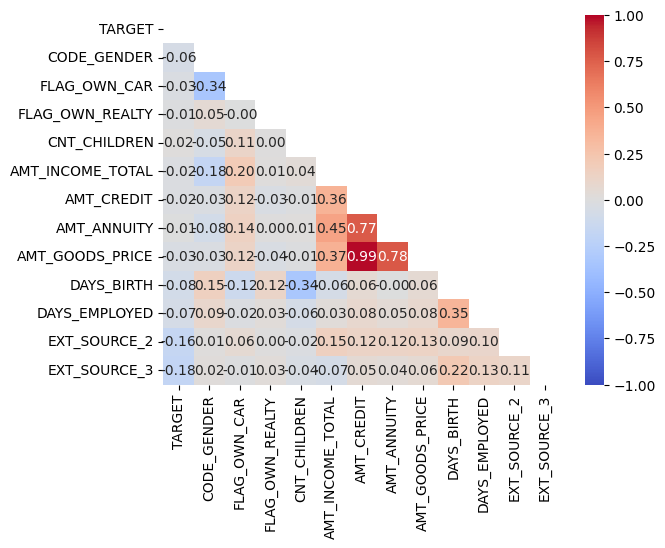

In [27]:
corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", mask=mask)

In [28]:
# on construit la matrice X des Features
X = df.drop(columns="TARGET")
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
299528,Revolving loans,2,1,1,0,270000.0,585000.0,29250.0,585000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,50.701370,24.536986,0.739046,0.577969,True
97172,Cash loans,1,0,1,0,225000.0,283585.5,28620.0,256500.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,27.320548,0.594521,0.704893,0.438281,False
184935,Cash loans,2,0,1,0,180000.0,1350000.0,51552.0,1350000.0,Unaccompanied,State servant,Secondary / secondary special,Civil marriage,House / apartment,53.019178,30.665753,0.770729,0.771362,True
226224,Revolving loans,2,0,1,0,270000.0,1350000.0,67500.0,1350000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,38.317808,1.920548,0.712531,0.763640,False
200714,Cash loans,1,0,0,2,157500.0,2013840.0,55507.5,1800000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,39.032877,6.643836,0.707783,0.621226,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203444,Cash loans,1,1,1,0,270000.0,271957.5,28687.5,252000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,25.295890,3.465753,0.456096,0.581484,False
297075,Cash loans,1,1,1,1,405000.0,1058197.5,38137.5,913500.0,Unaccompanied,Working,Higher education,Married,House / apartment,36.490411,6.057534,0.599163,0.355639,False
234059,Cash loans,1,1,1,0,112500.0,254700.0,14350.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,65.684932,NaN,0.204581,NaN,True
277630,Revolving loans,2,0,0,1,67500.0,202500.0,10125.0,202500.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,33.693151,7.183562,0.534781,0.554947,True


In [29]:
# On construit l vecteur y des Targets
y = df["TARGET"]
y

299528    0
97172     0
184935    0
226224    0
200714    0
         ..
203444    0
297075    0
234059    0
277630    0
19883     0
Name: TARGET, Length: 30751, dtype: int64

In [30]:
y.values

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
def resultize(grid, verbose=2):
    """make results based on gridsearchcv"""

    # make df
    results = pd.DataFrame(grid.cv_results_)

    # clean columns
    cols = [i for i in results.columns if not i.startswith("split")]
    results = results.loc[:, cols]

    if verbose == 2:
        print("coucou")

    return results.round(2)

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Modelisation

### Refactoring avec utilisation de Pipeline 

### Création du ColumnTransformer

In [ ]:
numerical_features = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    # "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
]

categorical_features = [
    "NAME_CONTRACT_TYPE",
    "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    # "OCCUPATION_TYPE",
    # "ORGANIZATION_TYPE",
]

In [ ]:
# Création de 2 Pipelines

numerical_pipeline = make_pipeline(KNNImputer(), StandardScaler())

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder()
)

In [ ]:
# Création du ColumnTransformer
# numerical_pipeline est appliquée sur les numerical_features
# categorical_pipeline est appliquée sur les categorical_features

ColumnTransformer = make_column_transformer(
    (numerical_pipeline, numerical_features),
    (categorical_pipeline, categorical_features),
)
ColumnTransformer

In [ ]:
pipe = Pipeline(
    [
        ("columntransformer", ColumnTransformer),
        #  ("inputer", KNNImputer()),
        #  ("scaler", StandardScaler()),
        ("estimator", DummyRegressor()),
    ]
)

In [ ]:
grid2 = GridSearchCV(
    pipe, param_grid={}, cv=5, verbose=2, return_train_score=True, n_jobs=-1
)
grid2

In [ ]:
grid2.fit(X, y)

In [ ]:
resultize(grid2)